# Implement Gradient Descent Algorithm for Multiple Linear Regression

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import data

In [2]:
data = pd.read_csv("auto_mpg.csv")

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


**Explanation of the Data**

This data tabulates "miles per gallon (mpg)" of different cars with different number of cylinders, displacement, power of the engine (in hp), weight of the car (in kg), accelaration of the car, model_year

For our exercise we shall choose the explanatory variables / predictors:

- displacement
- horsepower
- weight
- accelaration

All of these variables are quantitative in nature.

and our target variable is: mpg

In [4]:
data.shape

(398, 9)

So we have 398 datapoints. 

We will consider 300 randomly chosen datapoints as our training samples and rest of the data as test samples.

In [5]:
features = ['displacement', 'horsepower', 'weight', 'acceleration']
target = ['mpg']

## Data Preprocessing

In [6]:
data[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   horsepower    398 non-null    object 
 2   weight        398 non-null    float64
 3   acceleration  398 non-null    float64
dtypes: float64(3), object(1)
memory usage: 12.6+ KB


In [7]:
data[data['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


### drop the rows where horsepower is '?'

In [8]:
data = data.drop(data[data['horsepower']=='?'].index).reset_index(drop=True)

In [9]:
data['horsepower'] = data['horsepower'].values.astype('float')

In [10]:
data[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   horsepower    392 non-null    float64
 2   weight        392 non-null    float64
 3   acceleration  392 non-null    float64
dtypes: float64(4)
memory usage: 12.4 KB


## Choose X and y

In [11]:
X = data[features].values
y = data[target].values

### Split the data into train and test

Install `scikit-learn` package using `pip install scikit-learn` in your virtual environment


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300)

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((300, 4), (300, 1), (92, 4), (92, 1))

## Univariate analysis

### displacement

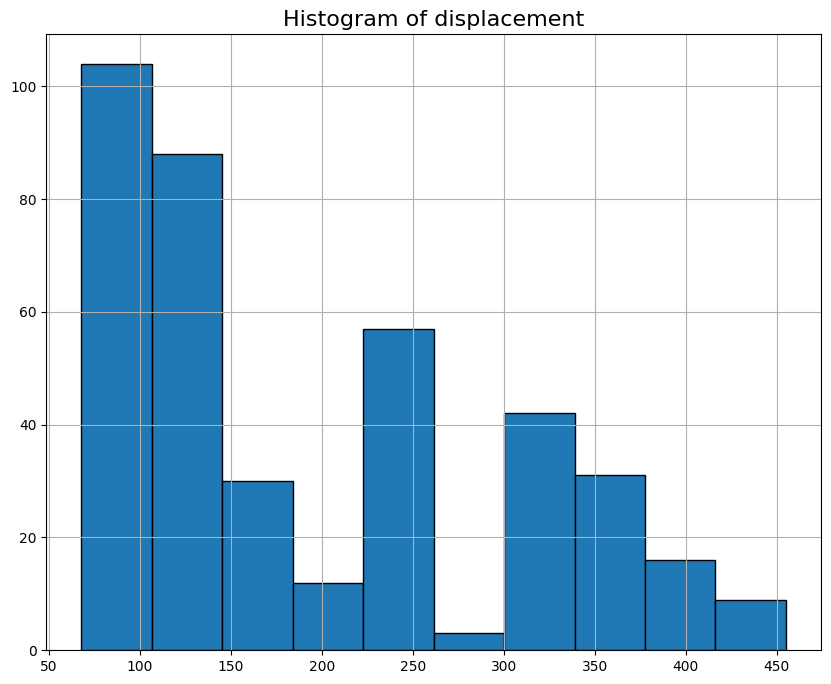

In [20]:
plt.figure(figsize=(10,8))
plt.hist(data['displacement'], edgecolor='k')
plt.grid()
plt.title("Histogram of displacement", fontsize=16)
plt.show()

### horsepower

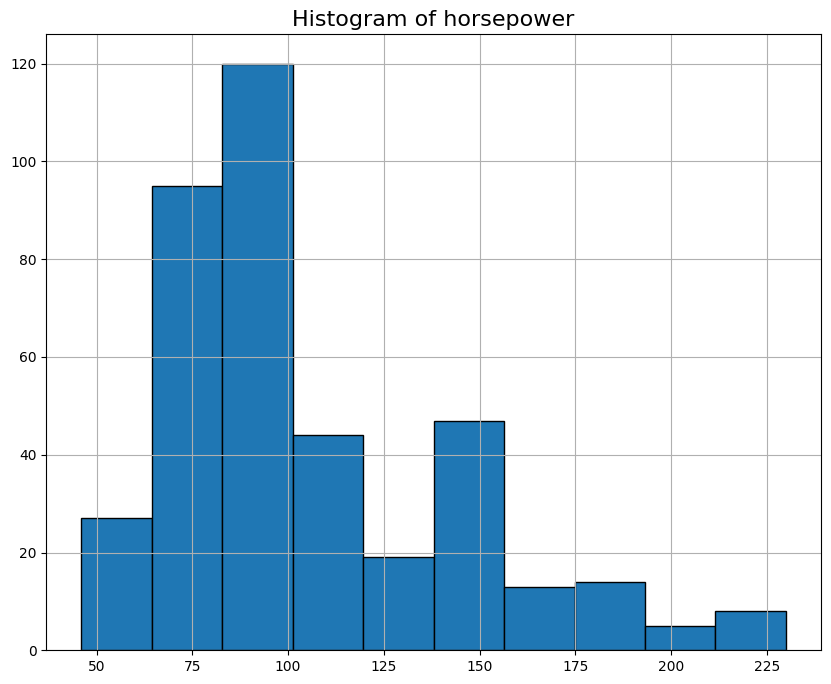

In [21]:
plt.figure(figsize=(10,8))
plt.hist(data['horsepower'], edgecolor='k')
plt.grid()
plt.title("Histogram of horsepower", fontsize=16)
plt.show()

### weight

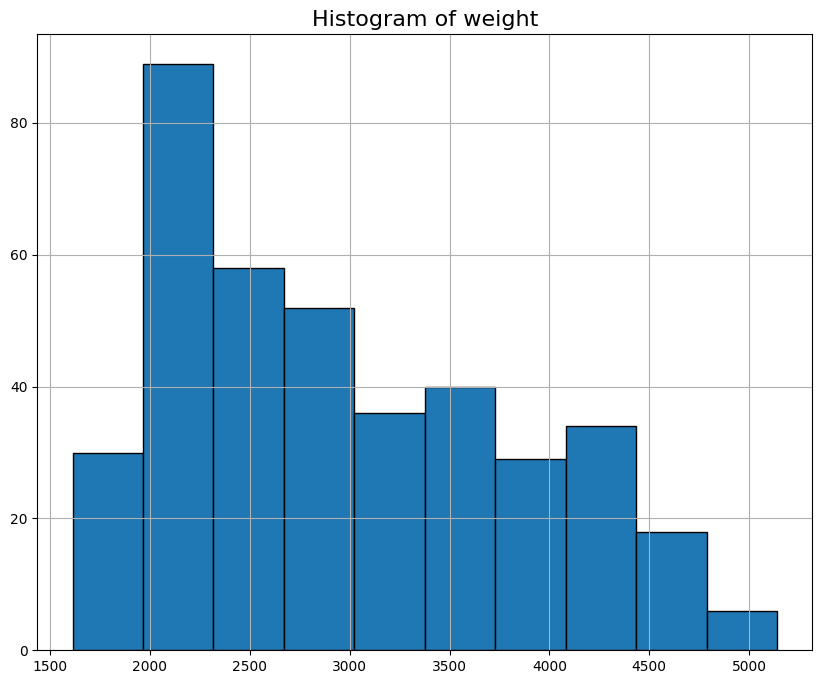

In [22]:
plt.figure(figsize=(10,8))
plt.hist(data['weight'], edgecolor='k')
plt.grid()
plt.title("Histogram of weight", fontsize=16)
plt.show()

### acceleration

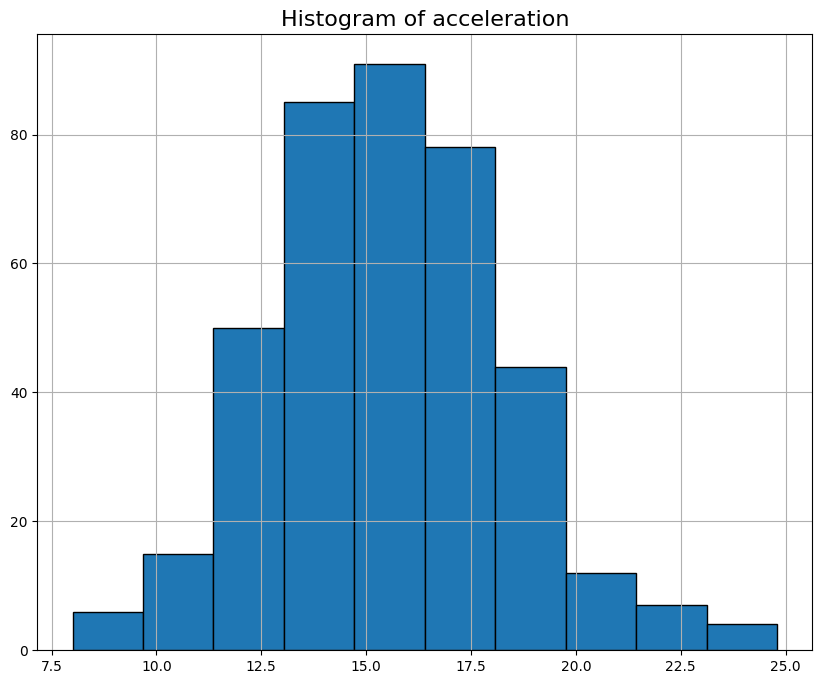

In [23]:
plt.figure(figsize=(10,8))
plt.hist(data['acceleration'], edgecolor='k')
plt.grid()
plt.title("Histogram of acceleration", fontsize=16)
plt.show()

## Feature Scaling

For gradient descent to work better we need features to be within same scale. 

We need to perform feature scaling in order to make gradient descent work better.

We will use min-max scaling.

$$x_j = \frac{x_j - x_j^{min}}{x_j^{max} - x_j^{min}}$$

In [32]:
X_train.shape[1]

4

In [37]:
for i in range(X_train.shape[1]):
    minimum = X_train[:,i].min()
    maximum = X_train[:,i].max()
    X_train[:,i] = (X_train[:,i] - minimum)/(maximum - minimum)
    X_test[:,i] = (X_test[:,i] - minimum)/(maximum - minimum)

In [38]:
X_train[0:5]

array([[0.04392765, 0.13407821, 0.10688971, 0.54216867],
       [0.10852713, 0.22905028, 0.30025517, 0.57228916],
       [0.18604651, 0.16201117, 0.26339665, 0.54216867],
       [0.64599483, 0.58100559, 0.61355259, 0.27108434],
       [0.13953488, 0.21787709, 0.19761837, 0.63253012]])

In [39]:
X_test[0:5]

array([[0.07751938, 0.18435754, 0.18202438, 0.58433735],
       [0.64599483, 0.52513966, 0.60164446, 0.31325301],
       [0.13178295, 0.25698324, 0.23277573, 0.42168675],
       [0.07751938, 0.20670391, 0.13098951, 0.47590361],
       [0.04651163, 0.10614525, 0.1026368 , 0.43373494]])

## Gradient Descent Algorithm

### Step-1: initialize model parameters with random values

We will have k+1 model parameters if we have k features

In [40]:
features

['displacement', 'horsepower', 'weight', 'acceleration']

In [41]:
k = len(features)

In [42]:
theta = np.random.rand(k+1)

In [43]:
theta

array([0.39187383, 0.44801415, 0.76425903, 0.96827562, 0.94502591])

### Step-2: add $x_0$ with all 1

In [44]:
x_0_train = np.ones(shape=X_train.shape[0])

In [46]:
x_0_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [45]:
x_0_train.shape

(300,)

In [47]:
X_train = np.hstack((x_0_train.reshape(-1,1), X_train))

In [48]:
x_0_test = np.ones(shape=X_test.shape[0])
X_test = np.hstack((x_0_test.reshape(-1,1), X_test))

In [49]:
X_train.shape

(300, 5)

In [50]:
X_train[0:5]

array([[1.        , 0.04392765, 0.13407821, 0.10688971, 0.54216867],
       [1.        , 0.10852713, 0.22905028, 0.30025517, 0.57228916],
       [1.        , 0.18604651, 0.16201117, 0.26339665, 0.54216867],
       [1.        , 0.64599483, 0.58100559, 0.61355259, 0.27108434],
       [1.        , 0.13953488, 0.21787709, 0.19761837, 0.63253012]])

In [51]:
X_test.shape

(92, 5)

In [52]:
X_test[0:5]

array([[1.        , 0.07751938, 0.18435754, 0.18202438, 0.58433735],
       [1.        , 0.64599483, 0.52513966, 0.60164446, 0.31325301],
       [1.        , 0.13178295, 0.25698324, 0.23277573, 0.42168675],
       [1.        , 0.07751938, 0.20670391, 0.13098951, 0.47590361],
       [1.        , 0.04651163, 0.10614525, 0.1026368 , 0.43373494]])

### Step-3: Create a function that predicts the target variable

$$\hat{y} = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + .... + \theta_k x_k$$

$$\hat{y} = \sum_{i=0}^{k} \theta_i x_i$$

In [55]:
theta.reshape(1,-1).shape

(1, 5)

In [65]:
def predict(params, X):
    return (X @ params.reshape(-1,1))

In [66]:
y_pred = predict(theta, X_train)

In [67]:
y_pred.shape, y_train.shape, X_train.shape, theta.shape

((300, 1), (300, 1), (300, 5), (5,))

### Step-4: Mean Square Error (MSE) Cost function 

$$ J = \frac{1}{2m} \sum_{i=1}^{m} (y_{pred} - y_{actual})^2$$

In [68]:
def cost_function(y_pred, y_actual):
    errors = y_pred - y_actual
    return np.square(errors).sum()/(2*y_pred.shape[0])

### Step-5: Gradient descent update rule

$$ \hat{\theta_j}(t+1) \leftarrow \hat{\theta_j}(t) - \frac{\alpha}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) x_j^{(i)} $$

In [80]:
def gradient_descent(X_values, y_values, theta_init, iterations = 1000, alpha = 0.01, alpha_scaling = False, tolerance = 0.0001):
    """
    inputs:
    -------
    X_values : training samples of features
    y_values : values of target varaible
    theta_init : initial values of model parameters
    tolerance : the minimum change in theta required
    iterations : total number of iterations
    alpha : learning rate
    alpha_scaling : moderate the value of learning rate
    
    output:
    -------
    theta : optimized model parameter
    cost_values : list of cost values
    """
    cost_values = []                      # starting with an empty list, will append the value of the cost function in each iteration.
    theta = theta_init                    # initializing the theta 
    it = 0                                # start with the iteration count = 0
    m = X_values.shape[0]                 # m = number of data / samples
    alpha_max = alpha                     # maximum value of learning rate
    alpha_min = alpha/100                 # minimum value of learning rate (will be used, if we use alpha scaling)
    
    #-------- Gradient descent algorithm -----------#

    while(it < iterations):                                 # Using max iteration stopping criteria inside a while loop
        y_pred = predict(theta, X_values)                   # Predicted value of the target variable
        cost = cost_function(y_pred, y_values)              # Calculate the cost function given predicted and actual values
        cost_values.append(cost)
        
        # alpha scaling
        if alpha_scaling:
            alpha = alpha_max - ((alpha_max - alpha_min)/(iterations))*it
        
        # gradient descent update rule
        del_theta = ((-1*alpha / m) * (X_values.T @ (y_pred - y_values)).flatten())
        theta = theta + del_theta

        it += 1                     # incrementing iteration count by 1

        # stopping criteria
        del_theta_mag = np.linalg.norm(del_theta)
        if del_theta_mag < tolerance:
            break
        
    return theta, cost_values

In [90]:
model_params, costs = gradient_descent(X_train, y_train, theta, iterations=1000, alpha=0.1, tolerance=1e-4, alpha_scaling=True)

In [91]:
model_params

array([ 27.99172637,  -9.70464203,  -3.4948021 , -10.52336983,
         8.64791475])

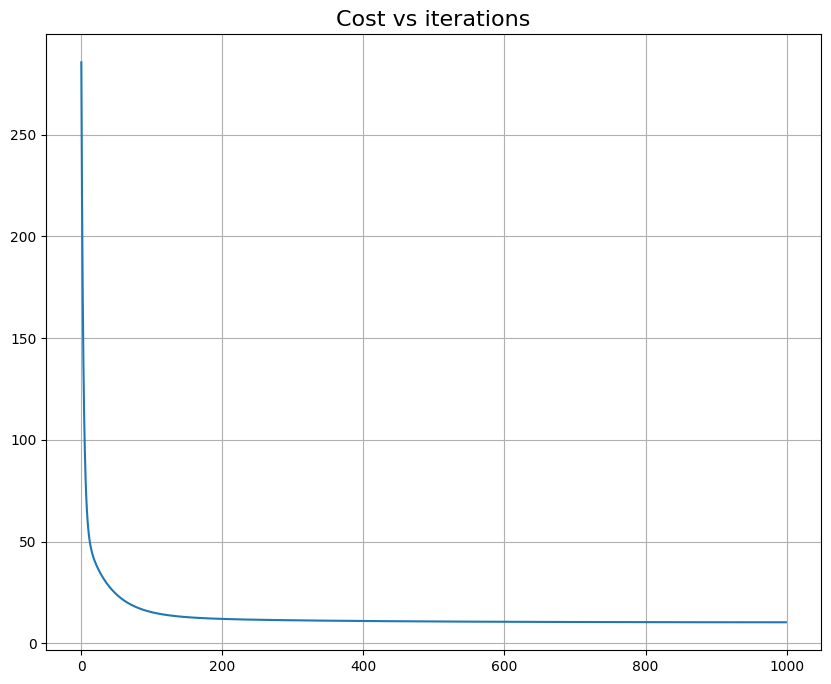

In [92]:
plt.figure(figsize=(10,8))
plt.plot(costs)
plt.grid()
plt.title("Cost vs iterations", fontsize=16)
plt.show()

## Evaluation

### On the training dataset

In [93]:
model_output = predict(model_params, X_train)

In [94]:
pd.DataFrame(np.hstack((model_output, y_train, model_output-y_train)), columns=['Predicted values', 'Actual values', 'Errors'])

,Predicted values,Actual values,Errors
0,30.660636,32.0,-1.339364
1,27.927436,25.0,2.927436
2,27.536823,25.0,2.536823
3,15.579752,15.0,0.579752
4,29.266608,19.0,10.266608
...,...,...,...
295,33.166330,29.0,4.166330
296,29.966094,32.0,-2.033906
297,25.181763,21.0,4.181763
298,15.815742,18.0,-2.184258


In [95]:
cost_function(model_output, y_train).item()

10.288282494266385

### Evaluation on test dataset

In [96]:
model_output = predict(model_params, X_test)

In [97]:
pd.DataFrame(np.hstack((model_output, y_test, model_output-y_test)), columns=['Predicted values', 'Actual values', 'Errors'])

,Predicted values,Actual values,Errors
0,29.732925,26.0,3.732925
1,16.264977,19.4,-3.135023
2,27.011840,37.0,-9.988160
3,29.254162,33.5,-4.245838
4,29.840209,34.1,-4.259791
...,...,...,...
87,12.008333,15.0,-2.991667
88,32.437960,26.0,6.437960
89,14.888443,14.0,0.888443
90,24.105326,20.8,3.305326


In [98]:
cost_function(model_output, y_test).item()

9.378354023887464

## Using sklearn library to perform linear regression

In [100]:
from sklearn.linear_model import LinearRegression

In [103]:
model = LinearRegression(tol=1e-4)

In [104]:
model

,fit_intercept,True
,copy_X,True
,tol,0.0001
,n_jobs,None
,positive,False


In [107]:
model.fit(X_train[:,1:], y_train)   # training the model  (x_0 column is not required)

,fit_intercept,True
,copy_X,True
,tol,0.0001
,n_jobs,None
,positive,False


### evaluation

In [108]:
y_pred_train = model.predict(X_train[:,1:])

In [109]:
pd.DataFrame(np.hstack((y_pred_train, y_train, y_pred_train-y_train)), columns=['Predicted values', 'Actual values', 'Errors'])

,Predicted values,Actual values,Errors
0,30.985804,32.0,-1.014196
1,26.610959,25.0,1.610959
2,27.698336,25.0,2.698336
3,16.444097,15.0,1.444097
4,28.217724,19.0,9.217724
...,...,...,...
295,32.751657,29.0,3.751657
296,31.319350,32.0,-0.680650
297,26.471315,21.0,5.471315
298,18.115002,18.0,0.115002


In [110]:
cost_function(y_pred_train, y_train).item()

9.280524487773162

In [111]:
y_pred_test = model.predict(X_test[:,1:])

In [112]:
pd.DataFrame(np.hstack((y_pred_test, y_test, y_pred_test-y_test)), columns=['Predicted values', 'Actual values', 'Errors'])

,Predicted values,Actual values,Errors
0,29.081381,26.0,3.081381
1,17.176011,19.4,-2.223989
2,27.510563,37.0,-9.489437
3,29.799458,33.5,-3.700542
4,31.468719,34.1,-2.631281
...,...,...,...
87,16.043797,15.0,1.043797
88,30.847252,26.0,4.847252
89,14.945208,14.0,0.945208
90,24.205894,20.8,3.405894


In [113]:
cost_function(y_pred_test, y_test).item()

7.907637040592133

In [ ]:
model.intercept_   # optimized theta_0 value

array([34.91114411])

In [115]:
model.coef_        # optimized rest of the model parameters

array([[ -3.24224416, -10.54340532, -16.17931557,  -1.18020906]])

### Normal Equation

The normal equation is the way to solve the optimum parameters of the linear regression model in closed form.

$$ \hat{\Theta} = (X^TX)^{-1}X^Ty $$

In [122]:
X = X_train.copy()
y = y_train.copy()

In [ ]:
theta_optimized = np.linalg.inv(X.T @ X) @ X.T @ y    # normal equation in numpy

theta_optimized

array([[ 34.91114411],
       [ -3.24224416],
       [-10.54340532],
       [-16.17931557],
       [ -1.18020906]])

In [128]:
y_pred_train = predict(theta_optimized.flatten(), X_train)

cost_function(y_pred_train, y_train).item()

9.28052448777316

In [126]:
y_pred_test = predict(theta_optimized.flatten(), X_test)

cost_function(y_pred_test, y_test).item()

7.907637040592212